C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Atributo 2')

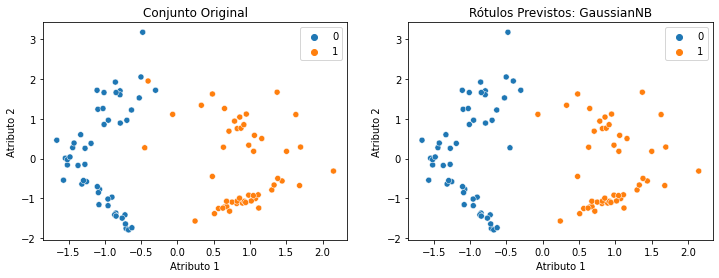

In [2]:
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as pyp
import seaborn as sb
# Cria conjunto de dados de 100 instâncias e 2 atributos
# não redundantes
X, y = make_classification(n_samples=100, n_features=2,n_redundant=0,random_state=1)
# Criando e treinando o modelo
model = GaussianNB()
model.fit(X, y)
# Prevendo os rótulos de cada instância com o modelo
# treinado
y_prevs = model.predict(X)
# Criando gráficos e legendas
fig, axes = pyp.subplots(1, 2, figsize=(12,4))
sb.scatterplot(X[:,0], X[:,1], hue=y, ax=axes[0])
sb.scatterplot(X[:,0], X[:,1], hue=y_prevs, ax=axes[1])
axes[0].set_title('Conjunto Original')
axes[0].set_xlabel('Atributo 1')
axes[0].set_ylabel('Atributo 2')
axes[1].set_title('Rótulos Previstos: GaussianNB')
axes[1].set_xlabel('Atributo 1')
axes[1].set_ylabel('Atributo 2')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Atributo 2')

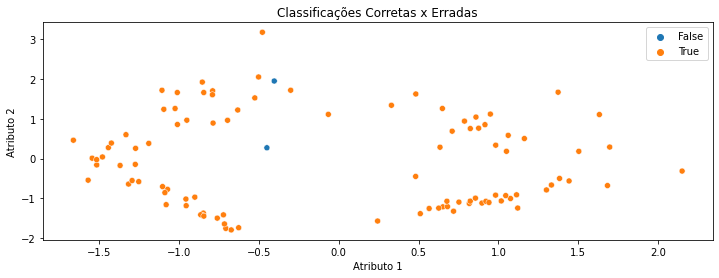

In [3]:
y_erros = [yy == yy_prevs for yy, yy_prevs in zip(y,y_prevs)]
# Criando gráficos e legendas
fig, axes = pyp.subplots(figsize=(12,4))
sb.scatterplot(X[:,0], X[:,1], hue=y_erros, ax=axes)
axes.set_title('Classificações Corretas x Erradas')
axes.set_xlabel('Atributo 1')
axes.set_ylabel('Atributo 2')

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
import pandas as pa
# Separa data em X e target em y
X = iris['data']
y = iris['target']
# Cria um DataFrame utilizando feature _ names como base para
# as colunas
df = pa.DataFrame(data=X, columns=iris['feature_names'])
# Adiciona a coluna de alvo dando nome aos rótulos conforme
# target_names
df['specie'] = [iris['target_names'][t] for t in y]
display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),specie
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


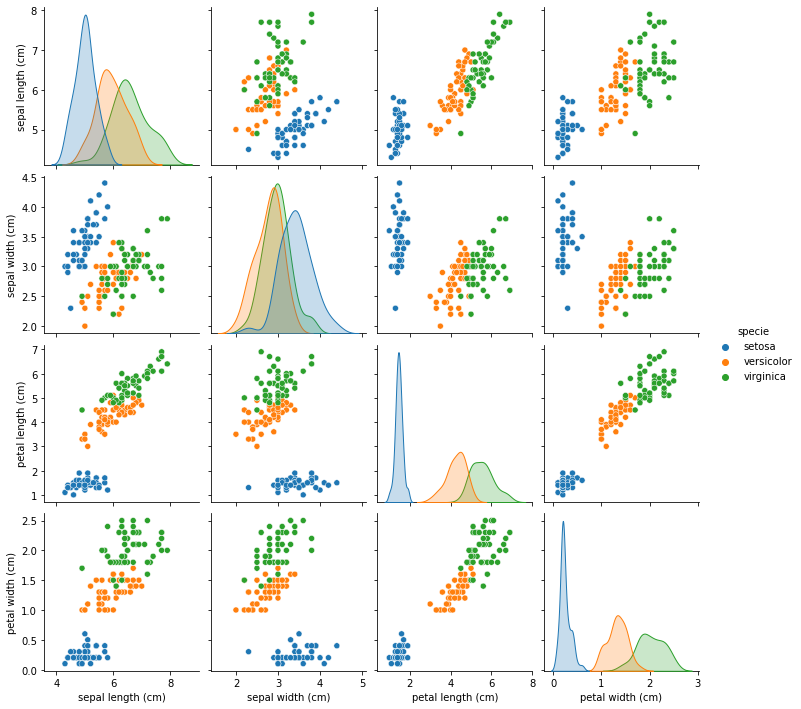

In [6]:
sb.pairplot(df, hue='specie')

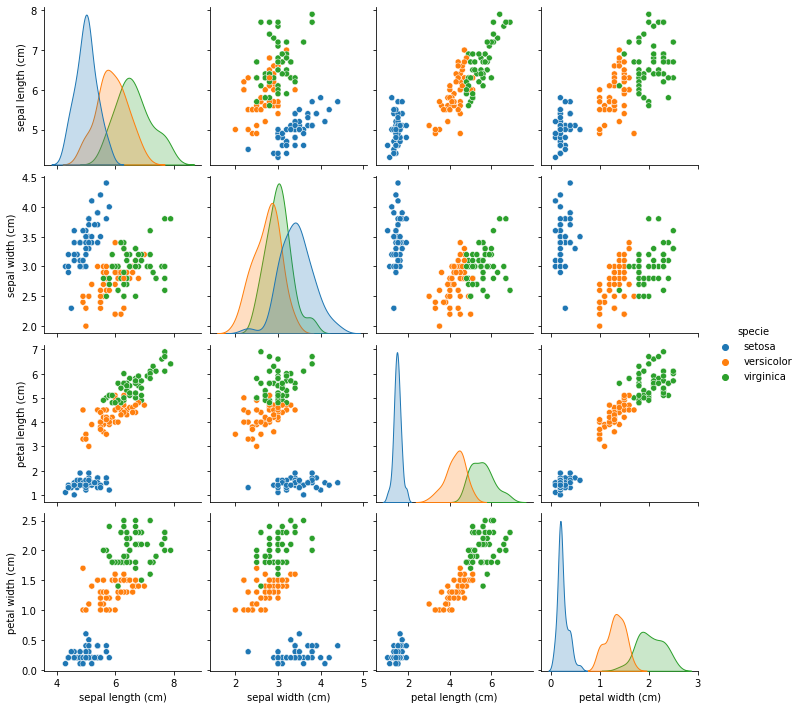

In [7]:
model = GaussianNB()
model.fit(X, y)
# Prevendo os rótulos de cada instância com o modelo
# treinado
y_prevs = model.predict(X)
# Copiando o quadro original
df_prev = df.copy()
# Substituindo os rótulos originais pelos previstos
df_prev['specie'] = [iris['target_names'][t] for t in
y_prevs]
# Exibindo o gráfico por pares dos rótulos previstos
sb.pairplot(df_prev, hue='specie')


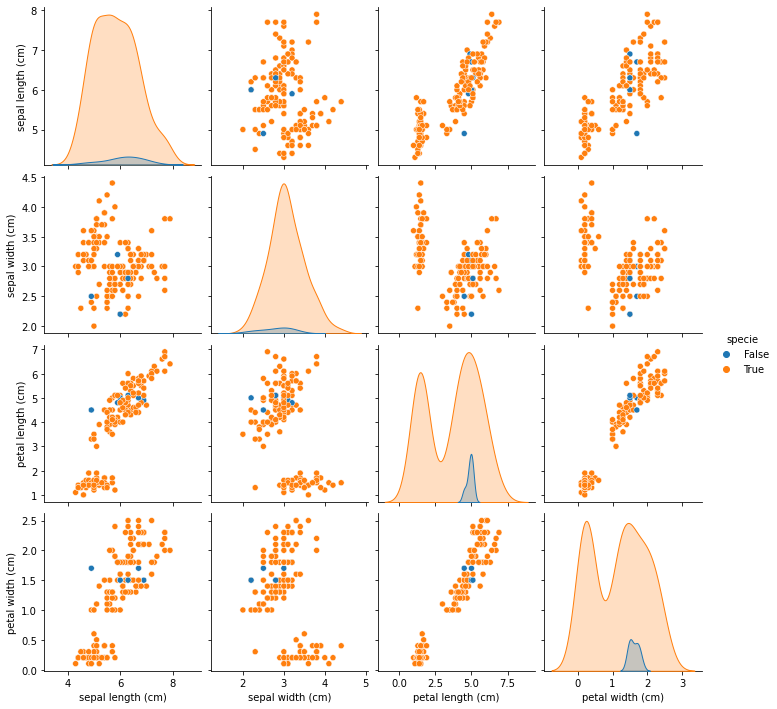

In [8]:
# Compara a classificação real e prevista de cada instância
y_erros = [yy == yy_prevs for yy, yy_prevs in zip(y,y_prevs)]
# Copiando o quadro original
df_erros = df.copy()
# Substituindo os rótulos originais pelos acertos/erros
# de previsão
df_erros['specie'] = y_erros
# Exibindo o gráfico por pares dos rótulos certo/errados
sb.pairplot(df_erros, hue='specie')

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

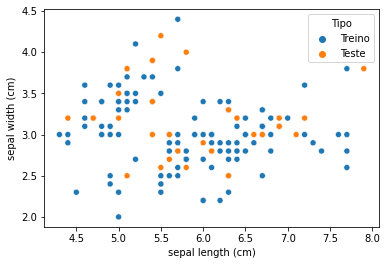

In [9]:
from sklearn.model_selection import train_test_split
feats = iris['feature_names']
Xdf = pa.DataFrame(X, columns=feats)
ydf = pa.DataFrame(y)
X_treino, X_teste, y_treino, y_teste = train_test_split(Xdf, ydf,test_size=0.2,random_state=1)
df = pa.DataFrame(X_treino)
df['Tipo'] = 'Treino'
df = df.append(X_teste)
df.loc[df['Tipo'].isnull(), 'Tipo'] = 'Teste'
dfy = pa.DataFrame(y_treino)
dfy = dfy.append(y_teste)
df['specie'] = dfy
sb.scatterplot(df[feats[0]], df[feats[1]], hue=df['Tipo'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


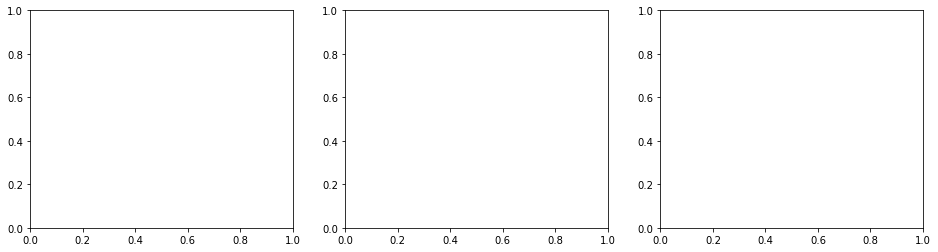

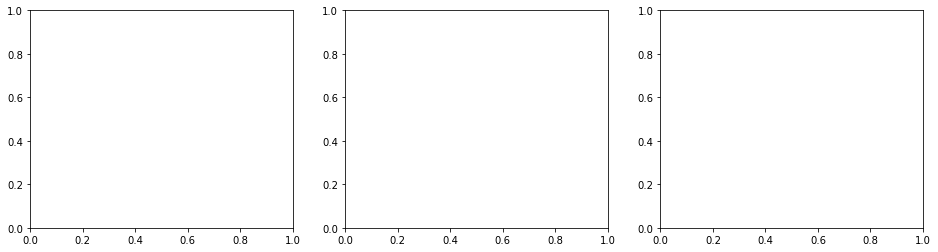

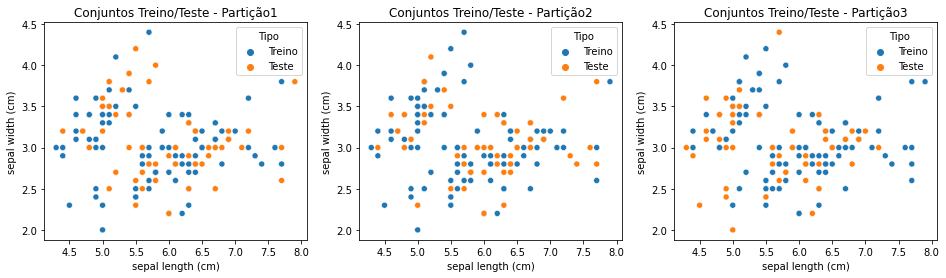

In [12]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
dfs = []
for i_treino, i_teste in kfold.split(Xdf):
 dftr = pa.DataFrame(X[i_treino], index=i_treino,columns=feats)
 dftr['Tipo'] = 'Treino'
 dftr = dftr.append(pa.DataFrame(X[i_teste],index=i_teste,columns=feats))
 dftr.loc[dftr['Tipo'].isnull(), 'Tipo'] = 'Teste'
 dftry = pa.DataFrame(y[i_treino], index=i_treino,columns=['specie'])
 dftry = dftry.append(pa.DataFrame(y[i_teste],index=i_teste,columns=['specie']))
 dftr['specie'] = dftry
 dfs.append(dftr)
 fig, axes = pyp.subplots(1,3,figsize=(16,4))
for i, dff in enumerate(dfs):
 sb.scatterplot(dff[feats[0]], dff[feats[1]], hue=dff['Tipo'],ax=axes[i])
 axes[i].set_title('Conjuntos Treino/Teste - Partição{0}'.format(i+1))

In [13]:
from sklearn.metrics import accuracy_score
dfss = dfs.copy()
dfss.append(df)
keys = ['KFold 1', 'KFold 2', 'KFold 3', 'Hold-Out']
dic_df = {k: d for k, d in zip(keys, dfss)}
accs = []
for k, d in dic_df.items():
 X_treino = d[d['Tipo']=='Treino'].drop(labels=['Tipo'],axis=1).values
 X_teste = d[d['Tipo']=='Teste'].drop(labels=['Tipo'],axis=1).values
 y_treino = d[d['Tipo']=='Treino']['specie'].values
 y_teste = d[d['Tipo']=='Teste']['specie'].values
 model = GaussianNB(var_smoothing=1)
 model.fit(X_treino, y_treino)
 accs.append([k, accuracy_score(y_teste, model.predict(X_teste))])
acc_df = pa.DataFrame(accs, columns=['Partição', 'Acurácia'])
acc_df.append(pa.DataFrame([['Média KFold', float(acc_df[:3].mean())]],columns=['Partição', 'Acurácia'],index=[len(acc_df)]))

,Partição,Acurácia
0,KFold 1,0.980000
1,KFold 2,0.880000
2,KFold 3,0.960000
3,Hold-Out,0.966667
4,Média KFold,0.940000


In [14]:
from sklearn.model_selection import cross_val_score

X = d.drop(labels=['Tipo'], axis=1).values
y = d['specie'].values
model = GaussianNB(var_smoothing=1)
pa.DataFrame(cross_val_score(model, X, y, cv=5),columns=['Acurácia'])

,Acurácia
0,1.000000
1,1.000000
2,1.000000
3,0.966667
4,1.000000


In [24]:
from sklearn.datasets import load_wine
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X,y = load_wine(True)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,test_size=0.2,random_state=1)

model = GaussianNB()
model.fit(X_treino,y_treino)
y_prevs = model.predict(X_teste)

accuracy_score(y_teste,y_prevs)


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass return_X_y=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


1.0

In [25]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X,y = load_iris(True)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,test_size=1/6,random_state=1)
model = GaussianNB()
model.fit(X,y)

y_prevs = model.predict(X_teste)

accuracy_score(y_teste,y_prevs)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass return_X_y=True as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.96